In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json

json_path = '/content/drive/MyDrive/XAI/yearly_shap.json'
with open(json_path, 'r') as f:
    yearly_shap= json.load(f)

json_path = '/content/drive/MyDrive/XAI/yearly_lime.json'
with open(json_path, 'r') as f:
    yearly_lime= json.load(f)

json_path = '/content/drive/MyDrive/XAI/yearly_ig.json'
with open(json_path, 'r') as f:
    yearly_ig= json.load(f)

In [ ]:
yearly_shap = pd.Series(yearly_shap)
yearly_lime = pd.Series(yearly_lime)
yearly_ig = pd.Series(yearly_ig)

In [ ]:
def normalize(series):
    total = series.abs().sum()
    return series / total

norm_shap = normalize(yearly_shap)
norm_lime = normalize(yearly_lime)
norm_ig = normalize(yearly_ig)

In [ ]:
df_compare = pd.DataFrame({
    'SHAP': yearly_shap,
    'LIME': yearly_lime,
    'IG': yearly_ig
})

print(df_compare)

                        SHAP      LIME        IG
-0.39 < lon_scaled       NaN  0.090783       NaN
-0.52 < lon_scaled       NaN -0.046254       NaN
duration_scaled     0.000000  0.000000  0.135780
lat_scaled         -0.015643  0.153262  0.200669
lon_scaled          0.064507 -0.059490  0.417027
start_month_cos    -0.046068 -0.527343  0.919992
start_month_sin     0.018735  0.000000  0.000014
start_year_scaled  -0.021530  0.037958  0.181161


In [ ]:
comparison_df = pd.DataFrame({
    "SHAP": norm_shap,
    "LIME": norm_lime,
    "IG": norm_ig
})
print(comparison_df)

                        SHAP      LIME        IG
-0.39 < lon_scaled       NaN  0.099206       NaN
-0.52 < lon_scaled       NaN -0.050545       NaN
duration_scaled     0.000000  0.000000  0.073211
lat_scaled         -0.093962  0.167483  0.108198
lon_scaled          0.387467 -0.065010  0.224856
start_month_cos    -0.276714 -0.576275  0.496048
start_month_sin     0.112533  0.000000  0.000008
start_year_scaled  -0.129324  0.041481  0.097680


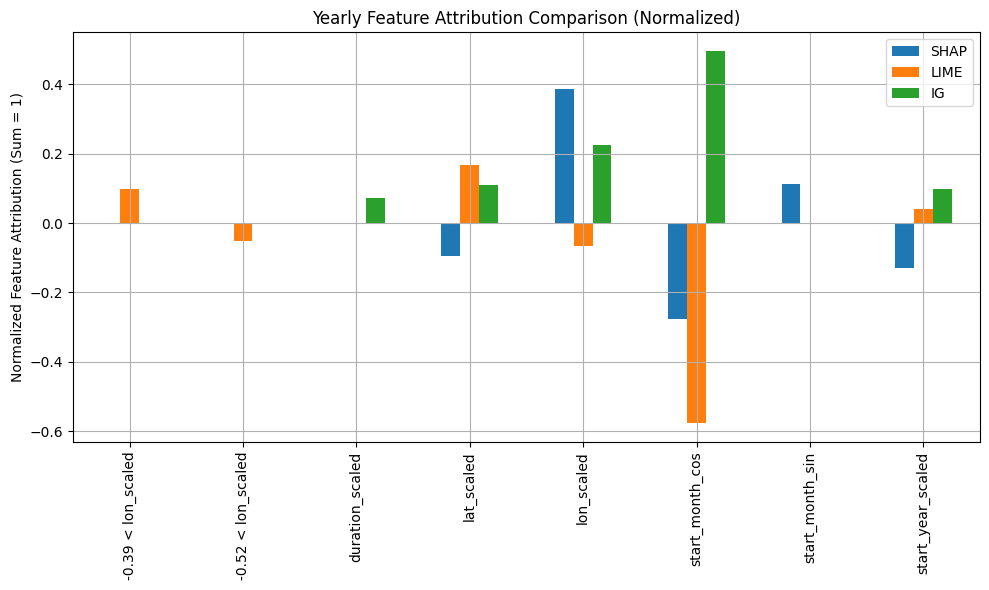

In [ ]:
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.ylabel("Normalized Feature Attribution (Sum = 1)")
plt.title("Yearly Feature Attribution Comparison (Normalized)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Your normalized values (from the previous plot)
shap_norm = yearly_shap / yearly_shap.abs().sum()
lime_norm = yearly_lime / yearly_lime.abs().sum()
ig_norm = yearly_ig / yearly_ig.abs().sum()

# Combine into a dataframe
ranking_df = pd.DataFrame({
    'SHAP': shap_norm,
    'LIME': lime_norm,
    'IG': ig_norm
})

# Add rank columns
# Add rank columns, handling NaN by filling with a placeholder like -1 or dropping them
ranking_df['SHAP Rank'] = ranking_df['SHAP'].abs().rank(ascending=False, na_option='bottom').fillna(-1).astype(int)
ranking_df['LIME Rank'] = ranking_df['LIME'].abs().rank(ascending=False, na_option='bottom').fillna(-1).astype(int)
ranking_df['IG Rank'] = ranking_df['IG'].abs().rank(ascending=False, na_option='bottom').fillna(-1).astype(int)

ranking_df = ranking_df.sort_values('SHAP Rank')

ranking_df


,SHAP,LIME,IG,SHAP Rank,LIME Rank,IG Rank
lon_scaled,0.387467,-0.065010,0.224856,1,4,2
start_month_cos,-0.276714,-0.576275,0.496048,2,1,1
start_year_scaled,-0.129324,0.041481,0.097680,3,6,4
start_month_sin,0.112533,0.000000,0.000008,4,7,6
lat_scaled,-0.093962,0.167483,0.108198,5,2,3
duration_scaled,0.000000,0.000000,0.073211,6,7,5
-0.39 < lon_scaled,NaN,0.099206,NaN,7,3,7
-0.52 < lon_scaled,NaN,-0.050545,NaN,7,5,7


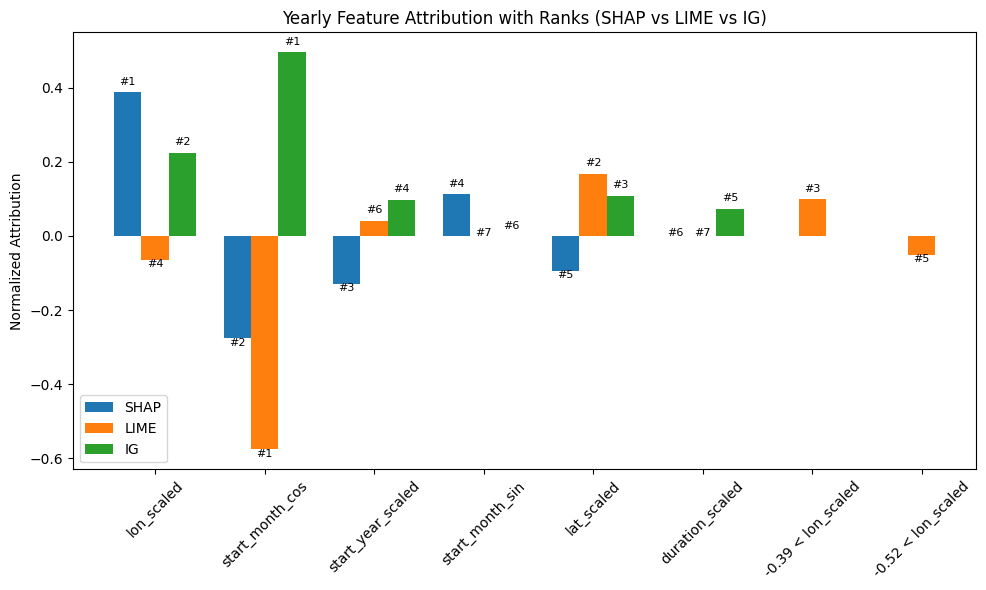

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

features = ranking_df.index

x = np.arange(len(features))
width = 0.25

plt.figure(figsize=(10, 6))

# Get the original feature names from the ranking_df columns
# Instead of accessing with index, use the columns directly
shap_features = ranking_df['SHAP']
lime_features = ranking_df['LIME']
ig_features = ranking_df['IG']

# Use .loc to access values using the correct index for each Series
# but using the index of the ranking_df
plt.bar(x - width, shap_features, width, label='SHAP')
plt.bar(x, lime_features, width, label='LIME')
plt.bar(x + width, ig_features, width, label='IG')

# Annotate ranks above each bar
for idx, method in enumerate(['SHAP', 'LIME', 'IG']):
    for i, feature in enumerate(features):
        # Access ranking_df using .loc with feature for rows and method for columns
        value = ranking_df.loc[feature, method]
        rank = ranking_df.loc[feature, f"{method} Rank"]
        plt.text(x[i] + (idx - 1) * width, value + 0.02*np.sign(value), f'#{rank}', ha='center', fontsize=8)

plt.xticks(x, features, rotation=45)
plt.ylabel("Normalized Attribution")
plt.title("Yearly Feature Attribution with Ranks (SHAP vs LIME vs IG)")
plt.legend()
plt.tight_layout()
plt.show()